Gaussian Blur:

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def gaussian_blur(image, kernel_size, sigma):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def create_mask(image, blurred_image):
    return image - blurred_image

# Function for unsharp masking
def unsharp_mask(image, k):
    blurred = cv2.GaussianBlur(image, (0, 0), 5)
    return cv2.addWeighted(image, 1.0 + k, blurred, -k, 0)

In [27]:
# Load the original image
image_path = r".\Moon.jpeg"
original_image = cv2.imread(image_path)

In [28]:
# Convert the image from BGR to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# (b) Image blurred using a 31x31 Gaussian lowpass filter with s = 5
blurred_image = gaussian_blur(original_image, 31, 5)

# (c) Mask
mask = create_mask(original_image, blurred_image)

# (d) Result of unsharp masking with k = 1
unsharp_masked = unsharp_mask(original_image, 1)

(-0.5, 3295.5, 3808.5, -0.5)

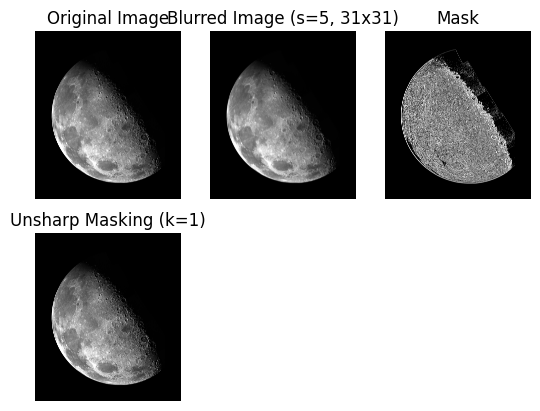

In [29]:
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Blurred Image (s=5, 31x31)')
plt.imshow(gaussian_blur(image_rgb, 31, 5))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Mask')
plt.imshow(mask)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Unsharp Masking (k=1)')
plt.imshow(unsharp_masked)
plt.axis('off')